In [1]:
import os
import pandas as pd
import seaborn as sns
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

path_to_shapenet_images = "../data/ShapeNet/ShapeNetRendering"
path_to_shapenet_models = "../data/ShapeNet/ShapeNetVox32"

In [4]:
number_of_models = 0
number_of_all_images = 0
images_with_models_paths = []
taxonomy_folders = os.listdir(path_to_shapenet_images)
for taxonomy in taxonomy_folders:
    if os.path.isdir(path_to_shapenet_images + os.path.sep + taxonomy):
        model_folders = os.listdir(path_to_shapenet_images + os.path.sep + taxonomy)
        for model_folder in model_folders:

            path_to_model = path_to_shapenet_models + os.path.sep + taxonomy + os.path.sep + model_folder + os.path.sep + "model.binvox"
            if os.path.exists(path_to_model):
                number_of_models +=1
                model_exists = True
            else:
                print(f"Model at path {path_to_shapenet_models + os.path.sep + taxonomy + os.path.sep + model_folder} does not exist for images at path: {path_to_shapenet_images + os.path.sep + taxonomy + os.path.sep + model_folder}")
                model_exists = False

            images_paths = os.listdir(path_to_shapenet_images + os.path.sep + taxonomy + os.path.sep + model_folder + os.path.sep + "rendering")
            for image_path in images_paths:
                full_image_path = path_to_shapenet_images + os.path.sep + taxonomy + os.path.sep + model_folder + os.path.sep + "rendering" +os.path.sep + image_path
                if os.path.exists(full_image_path):
                    number_of_all_images +=1
                    if model_exists:
                        images_with_models_paths.append(full_image_path)


Model at path ../data/ShapeNet/ShapeNetVox32\04090263\4a32519f44dc84aabafe26e2eb69ebf4 does not exist for images at path: ../data/ShapeNet/ShapeNetRendering\04090263\4a32519f44dc84aabafe26e2eb69ebf4


In [7]:
df = pd.DataFrame(data={"path": images_with_models_paths})

In [8]:
get_file_format = lambda path: path.split(".")[-1]
df['file_format'] = df['path'].apply(get_file_format)

In [9]:
df['file_format'].unique()

array(['png', 'txt'], dtype=object)

In [10]:
df = df[df['path'].str.endswith(".png")]


In [15]:
print(f"Number of models in the ShapeNet dataset: {number_of_models}")
print(f"Number of all images in the ShapeNet dataset: {number_of_all_images - (len(images_with_models_paths) - df['path'].count()+ 2)}")
print(f"Number of images for models in the ShapeNet dataset: {df['path'].count()}")
# This happens because images at
# data/ShapeNet/ShapeNetRendering/04090263/4a32519f44dc84aabafe26e2eb69ebf4/rendering
# and these images don't appropriate model. It is not a problem
# since these images don't show any model.

Number of models in the ShapeNet dataset: 43783
Number of all images in the ShapeNet dataset: 1050816
Number of images for models in the ShapeNet dataset: 1050792


In [16]:
get_width_and_height = lambda path: Image.open(path).size
df['img_size'] = df['path'].apply(get_width_and_height)


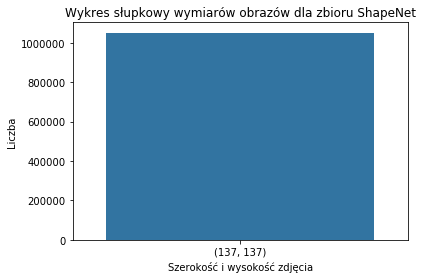

In [82]:
sns.countplot(data=df, x="img_size")
plt.title("Wykres słupkowy wymiarów obrazów dla zbioru ShapeNet")
plt.xlabel("Szerokość i wysokość zdjęcia")
plt.ylabel("Liczba")
plt.savefig("../reports/figures/shapenet_image_size.png")

In [71]:
summed_matrix = np.zeros(shape=(137,137,4))
for index, row in df.iterrows():
    img_matrix = np.asarray(Image.open(row['path']).convert('RGBA'))
    summed_matrix = summed_matrix + img_matrix

avg_matrix = summed_matrix/len(df)
avg_matrix = avg_matrix.astype('uint8')

In [77]:
averaged_out_image = Image.fromarray(avg_matrix, "RGBA")
averaged_out_image.save("../reports/figures/shapenet_averaged_out_image.png")